In [1]:
import matplotlib.pyplot as plt
import csv
import numpy as np

total = 29 # Exclude 1 subject
conditions = ['no_interrupt', 'interrupt', 'control', 'interrupt_w_explain', 'control_w_explain']
csv_file = "combined_data_5_20_plot_user_study_1.csv"

### Data Preprocessing --> Calculate Metrics

In [2]:
with open(csv_file, newline='') as csvfile:
    # creating a csv reader object
    reader = csv.DictReader(csvfile)
    score = np.zeros((10, total))
    step =  np.zeros((10, total))
    detection_fog = np.zeros((10, total))
    detection_no_fog = np.zeros((10, total))
    success = np.zeros((10, total))
    falling = np.zeros((10, total))
    trust = np.zeros((10, total))
    willingness = np.zeros((10, total))
    likeability = np.zeros((10, total))
    interrupt_fog = np.zeros((10, total))
    interrupt_no_fog = np.zeros((10, total))
    slippery_interrupt_fog = np.zeros((10, total))
    slippery_interrupt_no_fog = np.zeros((10, total))

    for j, row in enumerate(reader):
        for i in range(5):
            for round in range(2):
                score[i * 2 + round, j] = int(row['score_{}_round{}'.format(conditions[i], round)])
                step[i * 2 + round, j] = float(row['extra_step_{}_round{}'.format(conditions[i], round)])
                detection_fog[i * 2 + round, j] = int(row['detection_num_fog_{}_round{}'.format(conditions[i], round)])
                detection_no_fog[i * 2 + round, j] = int(row['detection_num_non_fog_{}_round{}'.format(conditions[i], round)])
                success[i * 2 + round, j] = int(row['success_{}_round{}'.format(conditions[i], round)])
                falling[i * 2 + round, j] = int(row['falling_num_{}_round{}'.format(conditions[i], round)])
                trust[i * 2 + round, j] = int(row['trust_{}_round{}'.format(conditions[i], round)])
                willingness[i * 2 + round, j] = int(row['willingness_{}_round{}'.format(conditions[i], round)])
                likeability[i * 2 + round, j] = int(row['likeability_{}_round{}'.format(conditions[i], round)])
                interrupt_fog[i * 2 + round, j] = int(row['interruption_num_fog_{}_round{}'.format(conditions[i], round)])
                interrupt_no_fog[i * 2 + round, j] = int(row['interruption_num_no_fog_{}_round{}'.format(conditions[i], round)])
                slippery_interrupt_fog[i * 2 + round, j] = int(row['slippery_interruption_num_fog_{}_round{}'.format(conditions[i], round)])
                slippery_interrupt_no_fog[i * 2 + round, j] = int(row['slippery_interruption_num_no_fog_{}_round{}'.format(conditions[i], round)])
#     print(10 - np.sum(success, axis=0), np.average(10 - np.sum(success, axis=0)), np.std(10 - np.sum(success, axis=0)))
    avg_score = np.average(score, axis=1)
    std_score = np.std(score, axis=1)
#     print(avg_score, std_score)
    avg_step = np.average(step, axis=1)
    std_step = np.std(step, axis=1)
#     print(avg_step, std_step)
    avg_detection_fog = np.average(detection_fog, axis=1)
    std_detection_fog = np.std((detection_fog[::2]+detection_fog[1::2])/2, axis=1)
    avg_detection_no_fog = np.average(detection_no_fog, axis=1)
    std_detection_no_fog = np.std((detection_no_fog[::2]+detection_no_fog[1::2])/2, axis=1)
    avg_falling = np.average(falling, axis=1)
    std_falling = np.std(falling, axis=1)
    avg_trust = np.average(trust, axis=1)
    std_trust = np.std(trust, axis=1)
    avg_willingness = np.average(willingness, axis=1)
    std_willingness = np.std(willingness, axis=1)
    avg_likeability = np.average(likeability, axis=1)
    std_likeability = np.std(likeability, axis=1)
    avg_interrupt_fog = np.average(interrupt_fog, axis=1)
    std_interrupt_fog = np.std((interrupt_fog[::2]+interrupt_fog[1::2])/2, axis=1)
    avg_interrupt_no_fog = np.average(interrupt_no_fog, axis=1)
    std_interrupt_no_fog = np.std((interrupt_no_fog[::2]+interrupt_no_fog[1::2])/2, axis=1)
    
    avg_slippery_interrupt_fog = np.average(slippery_interrupt_fog, axis=1)
    std_slippery_interrupt_fog = np.std((slippery_interrupt_fog[::2]+interrupt_fog[1::2])/2, axis=1)
    avg_slippery_interrupt_no_fog = np.average(slippery_interrupt_no_fog, axis=1)
    std_slippery_interrupt_no_fog = np.std((slippery_interrupt_no_fog[::2]+interrupt_no_fog[1::2])/2, axis=1)

## Objective Metrics Evaluation

### 1. Team Performance

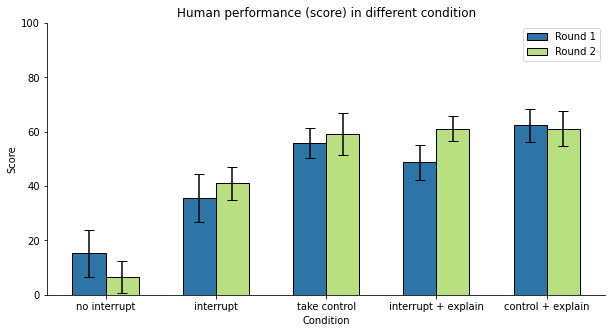

In [3]:
width = 0.3
fig, ax = plt.subplots(figsize=(10, 5))
b1 = ax.bar(x=np.array(range(5))-width/2, height=avg_score[::2], width=width, label='Round 1', color='#2E75A7', capsize=5, edgecolor='k', yerr=std_score[:9:2]/np.sqrt(total))
b2 = ax.bar(x=np.array(range(5))+width/2, height=avg_score[1::2], width=width, label='Round 2', color = '#B8DF80', capsize=5, edgecolor='k', yerr=std_score[1::2]/np.sqrt(total))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(0, 100)
ax.set_title('Human performance (score) in different condition')
ax.set_xlabel('Condition')
ax.set_ylabel('Score')
ax.set_xticks(np.array(range(5)))
ax.set_xticklabels(labels=['no interrupt', 'interrupt', 'take control', 'interrupt + explain', 'control + explain'])

plt.legend(loc='best')
# plt.savefig('score_study1.png', dpi=600)
plt.show()

### 2. Extra Steps

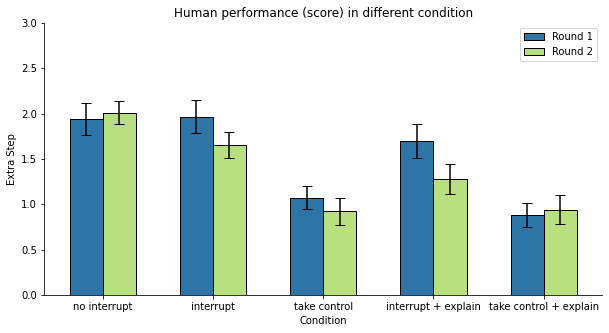

In [4]:
width = 0.3
fig, ax = plt.subplots(figsize=(10, 5))
b1 = ax.bar(x=np.array(range(5))-width/2, height=avg_step[::2], width=width, label='Round 1', color='#2E75A7', capsize=5, edgecolor='k', yerr=std_step[:9:2]/np.sqrt(total))
b2 = ax.bar(x=np.array(range(5))+width/2, height=avg_step[1::2], width=width, label='Round 2', color = '#B8DF80', capsize=5, edgecolor='k', yerr=std_step[1::2]/np.sqrt(total))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(0, 3)
ax.set_title('Human performance (score) in different condition')
ax.set_xlabel('Condition')
ax.set_ylabel('Extra Step')
ax.set_xticks(np.array(range(5)))
ax.set_xticklabels(labels=['no interrupt', 'interrupt', 'take control', 'interrupt + explain', 'take control + explain'])

plt.legend(loc='best')
# plt.savefig('extra_step_study1.png', dpi=600)
plt.show()

### 3. Falling Number

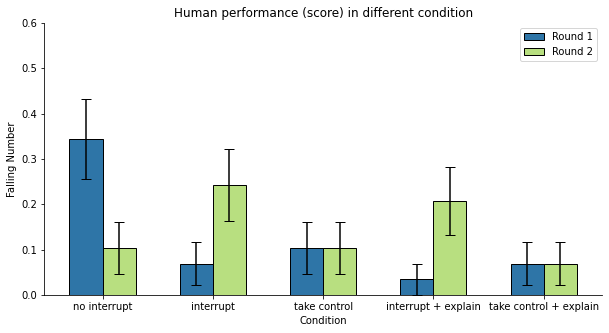

In [5]:
width = 0.3
fig, ax = plt.subplots(figsize=(10, 5))
b1 = ax.bar(x=np.array(range(5))-width/2, height=avg_falling[::2], width=width, label='Round 1', color='#2E75A7', capsize=5, edgecolor='k', yerr=std_falling[:9:2]/np.sqrt(total))
b2 = ax.bar(x=np.array(range(5))+width/2, height=avg_falling[1::2], width=width, label='Round 2', color = '#B8DF80', capsize=5, edgecolor='k', yerr=std_falling[1::2]/np.sqrt(total))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(0, 0.6)
ax.set_title('Human performance (score) in different condition')
ax.set_xlabel('Condition')
ax.set_ylabel('Falling Number')
ax.set_xticks(np.array(range(5)))
ax.set_xticklabels(labels=['no interrupt', 'interrupt', 'take control', 'interrupt + explain', 'take control + explain'])

plt.legend(loc='best')
# plt.savefig('falling_number_study1.png', dpi=600)
plt.show()

### 4. Detection number (averaged across both rounds)

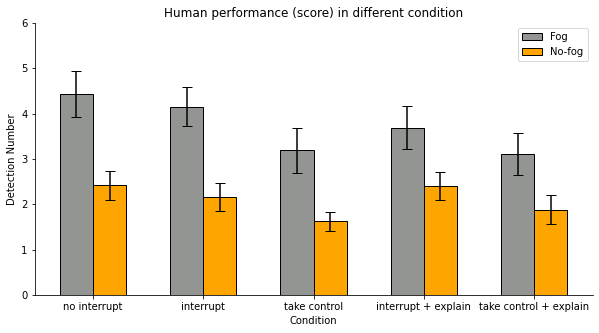

In [6]:
width = 0.3
fig, ax = plt.subplots(figsize=(10, 5))
b1 = ax.bar(x=np.array(range(5))-width/2, height=(avg_detection_fog[::2] + avg_detection_fog[1::2])/2, width=width, label='Fog', color='#929591', capsize=5, edgecolor='k', yerr=std_detection_fog/np.sqrt(total))
b2 = ax.bar(x=np.array(range(5))+width/2, height=(avg_detection_no_fog[::2] + avg_detection_no_fog[1::2])/2, width=width, label='No-fog', color = '#FFA500', capsize=5, edgecolor='k', yerr=std_detection_no_fog/np.sqrt(total))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(0, 6)
ax.set_title('Human performance (score) in different condition')
ax.set_xlabel('Condition')
ax.set_ylabel('Detection Number')
ax.set_xticks(np.array(range(5)))
ax.set_xticklabels(labels=['no interrupt', 'interrupt', 'take control', 'interrupt + explain', 'take control + explain'])

plt.legend(loc='best')
# plt.savefig('detection_number_study1.png', dpi=600)
plt.show()

### 5. Interruption Number

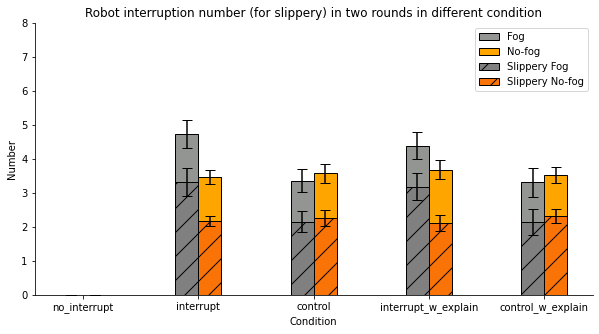

In [7]:
width = 0.2
fig, ax = plt.subplots(figsize=(10, 5))
# print(avg_interrupt_fog)
b3 = ax.bar(x=np.array(range(5))-width/2, height=(avg_interrupt_fog[::2] + avg_interrupt_fog[1::2])/2 , width=width, label='Fog', color='#929591', capsize=5, edgecolor='k', yerr=std_interrupt_fog/np.sqrt(total))
b4 = ax.bar(x=np.array(range(5))+width/2, height=(avg_interrupt_no_fog[::2] + avg_interrupt_no_fog[1::2])/2, width=width, label='No-fog', color = '#FFA500', capsize=5, edgecolor='k', yerr=std_interrupt_no_fog/np.sqrt(total))
b1 = ax.bar(x=np.array(range(5))-width/2, height=(avg_slippery_interrupt_fog[::2] + avg_slippery_interrupt_fog[1::2])/2, width=width, label='Slippery Fog', color='#808080', capsize=5, edgecolor='k', hatch='/', yerr=std_slippery_interrupt_fog/np.sqrt(total))
b2 = ax.bar(x=np.array(range(5))+width/2, height=(avg_slippery_interrupt_no_fog[::2] + avg_slippery_interrupt_no_fog[1::2])/2, width=width, label='Slippery No-fog', color = '#F97306', capsize=5, edgecolor='k', hatch='/', yerr=std_slippery_interrupt_no_fog/np.sqrt(total))
# b1 = ax.bar(x=np.array(range(4)), height=np.average(score, axis=1), width=width, color='tab:blue', capsize=5, edgecolor='k', yerr=np.std(score, axis=1)/np.sqrt(total))
ax.set_ylim(-0, 8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Robot interruption number (for slippery) in two rounds in different condition')
ax.set_xlabel('Condition')
ax.set_ylabel('Number')
ax.set_xticks(np.array(range(5)))
ax.set_xticklabels(labels=conditions)

plt.legend()
plt.show()
# plt.savefig('total_intervention_study1.png', dpi=600)

## Subjective Metrics

### 1. Trust

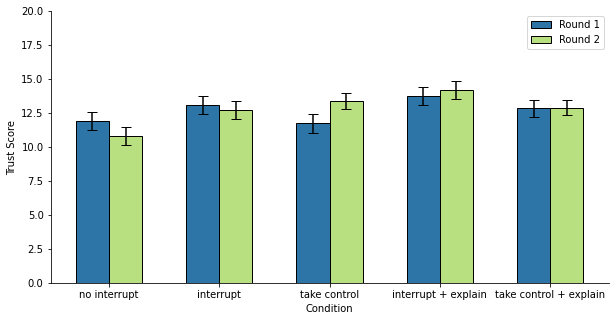

In [8]:
width = 0.3
fig, ax = plt.subplots(figsize=(10, 5))
b1 = ax.bar(x=np.array(range(5))-width/2, height=avg_trust[::2], width=width, label='Round 1', color='#2E75A7', capsize=5, edgecolor='k', yerr=std_trust[:9:2]/np.sqrt(total))
b2 = ax.bar(x=np.array(range(5))+width/2, height=avg_trust[1::2], width=width, label='Round 2', color = '#B8DF80', capsize=5, edgecolor='k', yerr=std_trust[1::2]/np.sqrt(total))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(0, 20)
# ax.set_title('Human performance (score) in different condition')
ax.set_xlabel('Condition')
ax.set_ylabel('Trust Score')
ax.set_xticks(np.array(range(5)))
ax.set_xticklabels(labels=['no interrupt', 'interrupt', 'take control', 'interrupt + explain', 'take control + explain'])

plt.legend(loc='best')
# plt.savefig('trust_study1.png', dpi=600)
plt.show()

### 2. Willingness

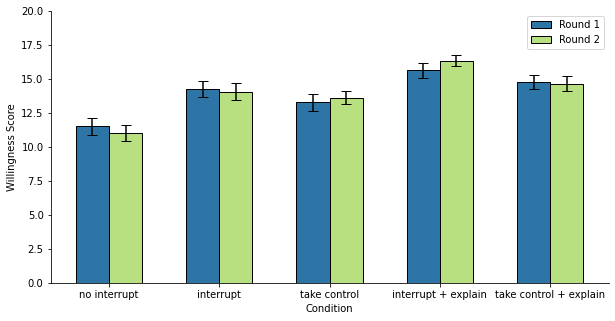

In [9]:
width = 0.3
fig, ax = plt.subplots(figsize=(10, 5))
# bp1 = box_plot((willingness[::2]).T, 'black', 'tab:blue', list(range(0, 9, 2)))
# bp2 = box_plot((willingness[1::2]).T, 'black', 'tab:red', list(range(1, 10, 2)))
b1 = ax.bar(x=np.array(range(5))-width/2, height=avg_willingness[::2], width=width, label='Round 1', color='#2E75A7', capsize=5, edgecolor='k', yerr=std_willingness[:9:2]/np.sqrt(total))
b2 = ax.bar(x=np.array(range(5))+width/2, height=avg_willingness[1::2], width=width, label='Round 2', color = '#B8DF80', capsize=5, edgecolor='k', yerr=std_willingness[1::2]/np.sqrt(total))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(0, 20)
# ax.set_title('Human performance (score) in different condition')
ax.set_xlabel('Condition')
ax.set_ylabel('Willingness Score')
ax.set_xticks(np.array(range(5)))
ax.set_xticklabels(labels=['no interrupt', 'interrupt', 'take control', 'interrupt + explain', 'take control + explain'])

plt.legend(loc='best')
# plt.savefig('willingness_study1.png', dpi=600)
plt.show()

### 3. Likeability

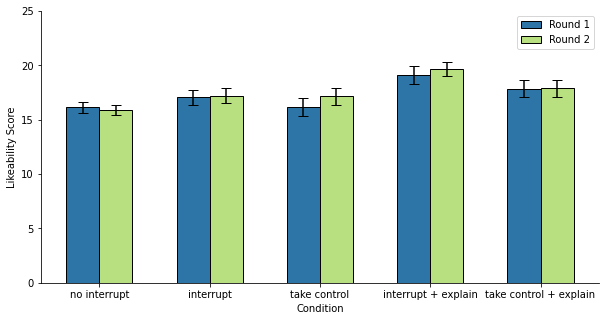

In [10]:
width = 0.3
fig, ax = plt.subplots(figsize=(10, 5))
b1 = ax.bar(x=np.array(range(5))-width/2, height=avg_likeability[::2], width=width, label='Round 1', color='#2E75A7', capsize=5, edgecolor='k', yerr=std_likeability[:9:2]/np.sqrt(total))
b2 = ax.bar(x=np.array(range(5))+width/2, height=avg_likeability[1::2], width=width, label='Round 2', color = '#B8DF80', capsize=5, edgecolor='k', yerr=std_likeability[1::2]/np.sqrt(total))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(0, 25)
# ax.set_title('Human performance (score) in different condition')
ax.set_xlabel('Condition')
ax.set_ylabel('Likeability Score')
ax.set_xticks(np.array(range(5)))
ax.set_xticklabels(labels=['no interrupt', 'interrupt', 'take control', 'interrupt + explain', 'take control + explain'])

plt.legend(loc='best')
# plt.savefig('likeability_study1.png', dpi=600)
plt.show()

### 4. User Preferences

### TODO: Did not exclude one participant (the total counts are adding upto 30)

In [11]:
total = 29 # Exclude 1
conditions = ['no_interrupt', 'interrupt', 'control', 'interrupt_w_explain', 'control_w_explain']
csv_file = "combined_data_5_20_rank_new.csv"

In [12]:
with open(csv_file, newline='') as csvfile:
    # creating a csv reader object
    reader = csv.DictReader(csvfile)

    rank = np.zeros(5*5)
    condition = np.array([0, 1, 2, 3, 4]*5)
    preference = np.array([0]*5 + [1]*5 + [2]*5 + [3]*5+ [4]*5)

    for j, row in enumerate(reader):
        rank[int(row['rank_no_interrupt'])*5+0-5] += 1
        rank[int(row['rank_interrupt'])*5+1-5] += 1
        rank[int(row['rank_interrupt_w_explain'])*5+3-5] += 1
        rank[2+ int(row['rank_control'])*5-5] += 1
        rank[4+int(row['rank_control_w_explain'])*5-5] += 1 


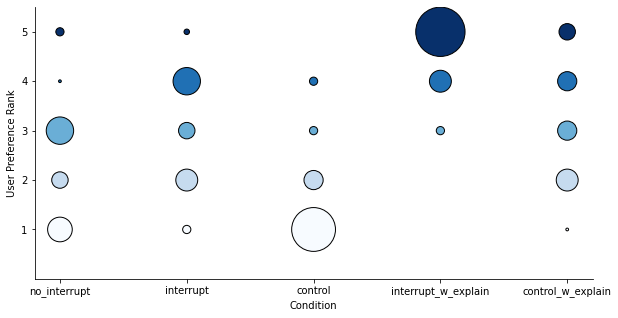

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))
s = ax.scatter(x=np.array(condition)+1, y=np.array(preference)+1, s=rank**2*7.5, c=np.array(preference)+1, cmap='Blues', edgecolor='k')
# ax.set_title('Human preference in different condition')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(0, 5.5)
ax.set_xlabel('Condition')
ax.set_ylabel('User Preference Rank')
ax.set_xticks(np.array(range(1, 6)))
ax.set_yticks(np.array(range(1, 6)))
ax.set_xticklabels(labels=conditions)
ax.set_yticklabels(labels=np.array(range(5))+1)

plt.savefig('preference_study1.png', dpi=600)
plt.show()

In [14]:
rank = rank.reshape((5, 5))

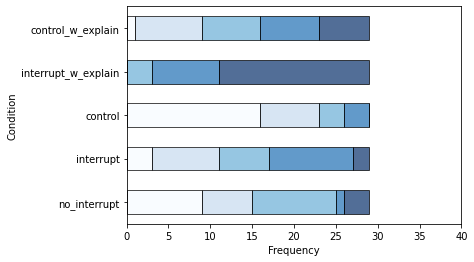

In [15]:
# Same plot as above as a horizontally stacked plot
categories = ['no_interrupt', 'interrupt', 'control', 'interrupt_w_explain', 'control_w_explain']
data1 = rank[0]
data2 = rank[1]
data3 = rank[2]
data4 = rank[3]
data5 = rank[4]

# Create a figure and axis
fig, ax = plt.subplots()

# Calculate the positions for the bars
positions = np.arange(len(categories))

# Create horizontally stacked bar plots
plt.barh(positions, data1, label='1', height=0.55, align='center', alpha=0.7, color='#F7FBFF', edgecolor='k')
plt.barh(positions, data2, label='2', height=0.55, align='center', alpha=0.7, left=data1, color='#C6DBEF', edgecolor='k')
plt.barh(positions, data3, label='3', height=0.55, align='center', alpha=0.7, left=np.array(data1) + np.array(data2), color='#6AAED6', edgecolor='k')
plt.barh(positions, data4, label='4', height=0.55, align='center', alpha=0.7, left=np.array(data1) + np.array(data2) + np.array(data3), color='#2070B4', edgecolor='k')
plt.barh(positions, data5, label='5', height=0.55, align='center', alpha=0.7, left=np.array(data1) + np.array(data2) + np.array(data3) + np.array(data4), color='#08306B', edgecolor='k')

# Set category labels on the y-axis
ax.set_yticks(positions)
ax.set_yticklabels(categories)
ax.set_xlim((0,40))

# Add labels and a legend
plt.xlabel('Frequency')
plt.ylabel('Condition')
# plt.legend(loc='best')

# Show the plot
# plt.show()
plt.savefig('preferences_user_study_1_hbar.png', dpi=600)